# Task 3

In [65]:
# importing libraries
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set() 

In [4]:
# Load datasets
orders = pd.read_csv(r"C:\Users\hp\Documents\pizza_sales\orders.csv", encoding='latin1')
order_details = pd.read_csv(r"C:\Users\hp\Documents\pizza_sales\order_details.csv", encoding='latin1')
pizzas = pd.read_csv(r"C:\Users\hp\Documents\pizza_sales\pizzas.csv", encoding='latin1')
pizza_types = pd.read_csv(r"C:\Users\hp\Documents\pizza_sales\pizza_types.csv", encoding='latin1')

In [5]:
df = (
    order_details.merge(orders, on='order_id')
                 .merge(pizzas, on='pizza_id')
                 .merge(pizza_types, on='pizza_type_id')
)

In [6]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


### 1.	What is the total revenue/sales?

In [11]:
#total revenue/sales
df['total_price'] = df['quantity'] * df['price']
total_sales = df['total_price'].sum()
total_sales

817860.05

### 2.	Find the total quantity sold.

In [14]:
#total quantity sold
total_quantity = df['quantity'].sum()
total_quantity 

49574

### 3.	Find the total orders.

In [18]:
#total orders
df['order_id'].nunique()

21350

### 4.	How many pizza types do they sell?

In [17]:
#Number of Pizza types
df['pizza_type_id'].nunique()

32

### 5.	Find the average price of the pizzas.

In [20]:
#average price if the pizzas
df['price'].mean()

16.494132044426163

### 6.	What are the peak hours of sales?

In [24]:
#peak hours
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
peak_hours = df.groupby(['time', 'hour'])['total_price'].sum().sort_values(ascending=False)
peak_hours

time                 hour
2025-05-11 12:32:00  12      460.20
2025-05-11 12:25:12  12      444.20
2025-05-11 12:53:29  12      419.75
2025-05-11 13:31:27  13      417.15
2025-05-11 12:52:36  12      400.75
                              ...  
2025-05-11 11:52:10  11        9.75
2025-05-11 13:18:56  13        9.75
2025-05-11 18:45:34  18        9.75
2025-05-11 19:00:46  19        9.75
2025-05-11 12:31:26  12        9.75
Name: total_price, Length: 16382, dtype: float64

### 7.	Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [26]:
# days of the week for most sales
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
sales_by_day = df.groupby('day_of_week')['total_price'].sum().sort_values(ascending=False)
sales_by_day

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: total_price, dtype: float64

### 8.	Find the top 5 bestselling pizzas.

In [29]:
top_pizzas = df.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False).head(5)
top_pizzas

pizza_type_id
classic_dlx    2453
bbq_ckn        2432
hawaiian       2422
pepperoni      2418
thai_ckn       2371
Name: quantity, dtype: int64

In [56]:
df['month'] = df['date'].dt.month_name()
df['month_num'] = df['date'].dt.month
sales_by_month = df.groupby(['month_num', 'month'])['total_price'].sum().reset_index()
sales_by_month

,month_num,month,total_price
0,1,January,69793.30
1,2,February,65159.60
2,3,March,70397.10
3,4,April,68736.80
4,5,May,71402.75
5,6,June,68230.20
6,7,July,72557.90
7,8,August,68278.25
8,9,September,64180.05
9,10,October,64027.60


### 9.	Find the sales made in each month. Any trend noticeable?

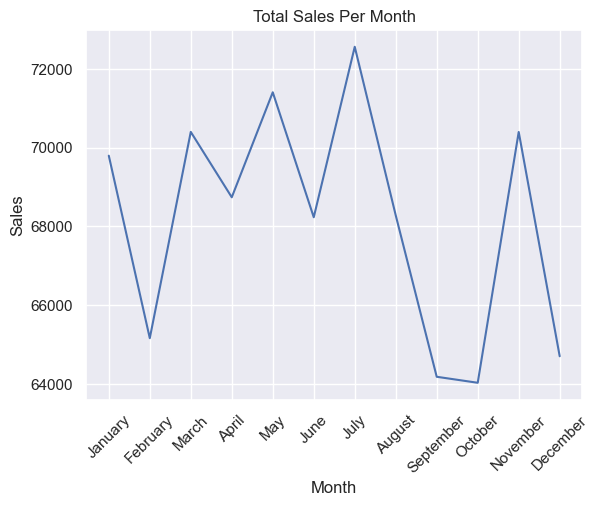

In [64]:
# line plot trend
plt.plot(sales_by_month['month'], sales_by_month['total_price'])
plt.xticks(rotation = 45)
plt.title("Total Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### 10.	Are there pizza types that are not doing well on the menu?

In [63]:
low_sellers = df.groupby('pizza_type_id')['quantity'].sum().sort_values().head(5)
low_sellers

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64